In [1]:
import numpy as np
import random as Random
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
x=np.random.rand(50) # Random x values
x1 = []
m = 5
y = []
for i in range(len(x)):
    # Creating the random y values
    c = np.random.rand()
    y.append((m*x[i])+c)
    
    # Reshaping x to make it a 2D array of x values. X can have multiple variables. Each column corresponds to one. We only have 1 x variable.
    x1.append([x[i]])



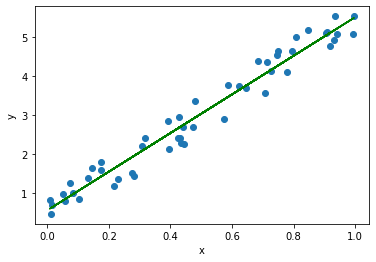

In [3]:
# Applying linear regression
res = LinearRegression().fit(x1, y)

# Predicting on the same data cuz we don't have new data ;)
y1 = res.predict(x1)

# Let the plots begin
plt.scatter(x,y)
plt.plot(x,y1, color = 'green')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [7]:
# GD from scratch
def GD_Batch(x,y):
    wc = bc = 0
    iter = 10000
    n = len(x)
    α = 0.01
    for i in range(iter):
        yp = (wc*x)+bc
        wd = -(2/n)*sum(x*(y-yp))
        bd = -(2/n)*sum(y-yp)
        wc = wc-(α*wd)
        bc = bc-(α*bd)
        #print("m {}, b {}, iteration {}".format(mc,bc,i))
    return(wc,bc)

def SGD(x,y):
    wc = bc = 0
    iter = 10000
    n = len(x)
    α = 0.01
    for i in range(iter):
        ya = np.random.choice(y)
        xa = x[y.index(ya)]
        yp = (wc*xa)+bc
        wd = -2*xa*(ya-yp)
        bd = -2*(ya-yp)
        wc = wc-(α*wd)
        bc = bc-(α*bd)
        #print("m {}, b {}, iteration {}".format(mc,bc,i))
    return(wc,bc)
    
    
# Mini Batch GD (mini batch size 20)
def minBatchGD(x,y):
    wc = bc = 2
    iter = 10000
    n = len(x)
    α = 0.01
    bs = 3
    for i in range(iter):
        ya = Random.sample(y,k = bs)
        xa = np.zeros(bs)
        for i in range(bs):
            xa[i] = x[y.index(ya[i])]
        yp = (wc*xa)+bc
        wd = -(2/bs)*sum(xa*(ya-yp))
        bd = -(2/bs)*sum(ya-yp)
        wc = wc-(α*wd)
        bc = bc-(α*bd)
        #print("m {}, b {}, iteration {}".format(mc,bc,i))
    return(wc,bc)

    

w1,b1 = GD_Batch(x,y)
w2,b2 = SGD(x,y)
w3,b3 = minBatchGD(x,y)

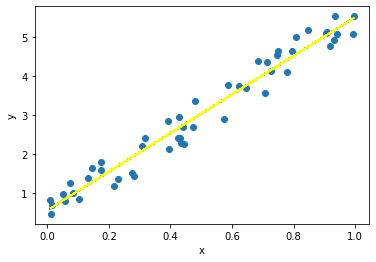

In [10]:
plt.scatter(x,y)
plt.plot(x,y1,color = 'green')
plt.plot(x,w1*x+b1, '-.' ,color = 'yellow')
# plt.plot(x,w3*x+b3, '.' ,color = 'red')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [19]:
# Comparing the results of the different types of GDs
print(res.coef_,res.intercept_)
print(w1,b1)
print(w2,b2)
print(w3,b3)

[4.95020741] 0.5610141823864812
4.950206434011355 0.5610146993132102
4.9903433651698625 0.5134126161191129
4.943508922090738 0.5331449394436079
